In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.stats import chi2

# чтение данных
with open('data1.txt', 'r') as f:
    data = np.loadtxt(f)

df = pd.DataFrame(data)
df

C:\Users\Таня\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,0,1,2,3,4,5,6,7
0,6.0,2.0,4.0,4.0,7.0,4.0,6.0,6.0
1,10.0,10.0,9.0,9.0,9.0,9.0,10.0,9.0
2,7.0,6.0,7.0,4.0,5.0,4.0,7.0,7.0
3,7.0,5.0,6.0,6.0,7.0,6.0,8.0,7.0
4,8.0,6.0,7.0,5.0,6.0,5.0,8.0,7.0
...,...,...,...,...,...,...,...,...
95,8.0,6.0,7.0,7.0,8.0,7.0,8.0,8.0
96,6.0,3.0,4.0,4.0,6.0,4.0,7.0,6.0
97,9.0,9.0,9.0,8.0,9.0,9.0,10.0,9.0
98,6.0,4.0,6.0,3.0,5.0,4.0,7.0,6.0


In [11]:
# Нормировка исходных данных для устранения неоднородности в исходных данных

mean = data.mean(axis = 0)
std_dev = data.std(axis = 0)
standardized_data = (df - mean) / std_dev
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)

# построение матрицы ковариации
# Ввиду произведенной нормализации данных матрица ковариаций будет корреляционной матрицей исходных данных R порядка K × K.

cov = df.cov()
df_rows = df.shape[0]
df_cols = df.shape[1]
d = 0
for i in range(df_cols):
    for j in range(i, df_cols):
        d += cov.iloc[i, j] ** 2

d *= df_rows

chi_square = chi2.ppf(0.95, df_cols * (df_cols - 1) / 2)

print(f"хи-квадрат: {chi_square}, d : {d}")

хи-квадрат: 41.33713815142739, d : 2990.1362897116724


In [12]:
# собственные значения и собственный вектор
Lambda, A = np.linalg.eig(cov)

Z = np.dot(df, A)

# Сумма дисперсий проекций объектов на главные компоненты
sum_Z = np.sum(np.diag(Lambda))

# сумма дисперсий исходных признаков
sum_X = np.sum(np.var(df, axis = 0) ** 2)

print(f"Сумма дисперсий проекций объектов на главные компоненты: {sum_Z}, сумма дисперсий исходных признаков: {sum_X}")

Сумма дисперсий проекций объектов на главные компоненты: 8.080808080808094, сумма дисперсий исходных признаков: 7.999999999999993


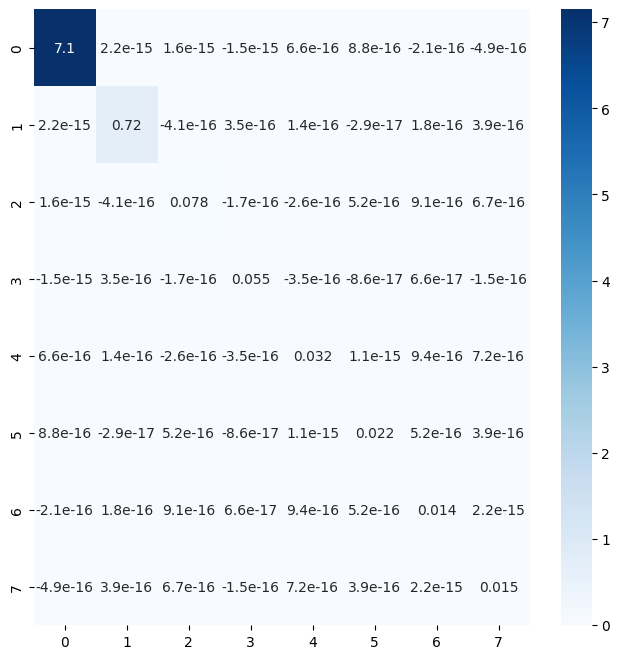

In [13]:
# матрица ковариаций

Z = pd.DataFrame(Z)

plt.figure(figsize = (8, 8))
sns.heatmap(Z.cov(), cmap = 'Blues', annot = True)
plt.show()


In [14]:
# Определить относительную долю разброса, приходящуюся на главные компоненты

alpha = list(Lambda[i] for i in range(df_cols))

lambda_sum = np.sum(Lambda)

alpha /= lambda_sum

print(alpha)

[0.88553849 0.0927712  0.00686897 0.00136388 0.00216582 0.00284932
 0.00395707 0.00448525]


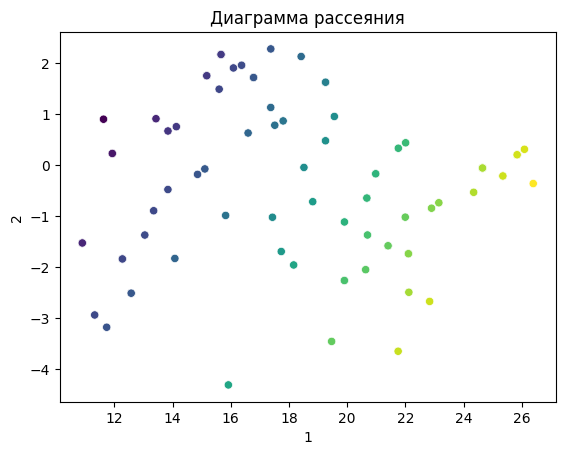

In [11]:
#На основе первых M = 2 главных компонент построить диаграмму рассеяния
sns.scatterplot(x = Z.iloc[:, 0], y = Z.iloc[:, 1], c = Z.iloc[:, 0] - Z.iloc[:, 1])
plt.xlabel("1")
plt.ylabel("2")
plt.title("Диаграмма рассеяния")   
plt.show()